<a href="https://colab.research.google.com/github/g-tumwesigye/fitpulse_app/blob/main/fitpulse_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import joblib
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import cross_val_score


In [24]:
# Loading the dataset
fitpulse_dataset = pd.read_csv('fitpulse_dataset.csv')

# Displaying the first few rows of the data set
fitpulse_dataset.head()


,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4


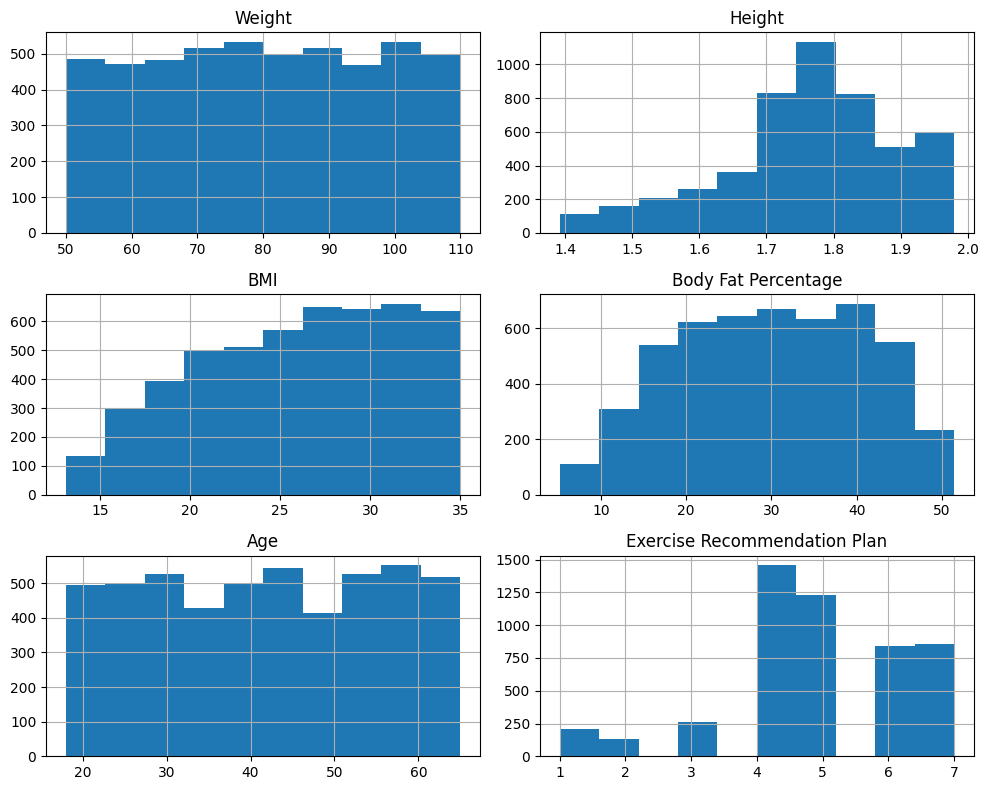

In [25]:
# histograms
fitpulse_dataset.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

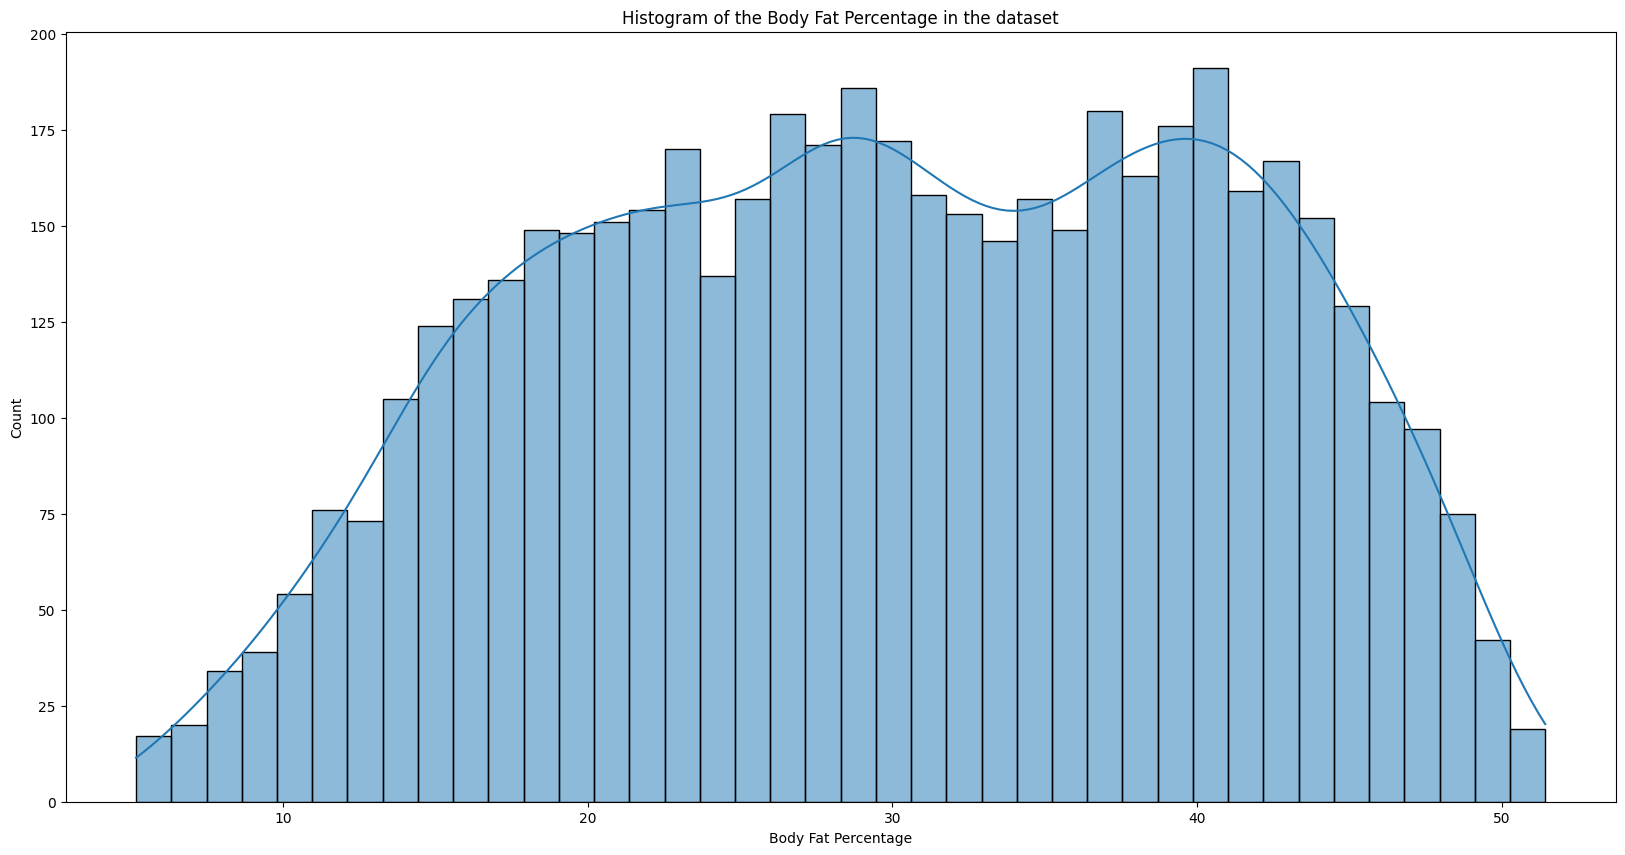

In [26]:
plt.figure(figsize=(20,10))
plt.title('Histogram of the Body Fat Percentage in the dataset')
sns.histplot(data=fitpulse_dataset, x='Body Fat Percentage', bins=40, kde= True);

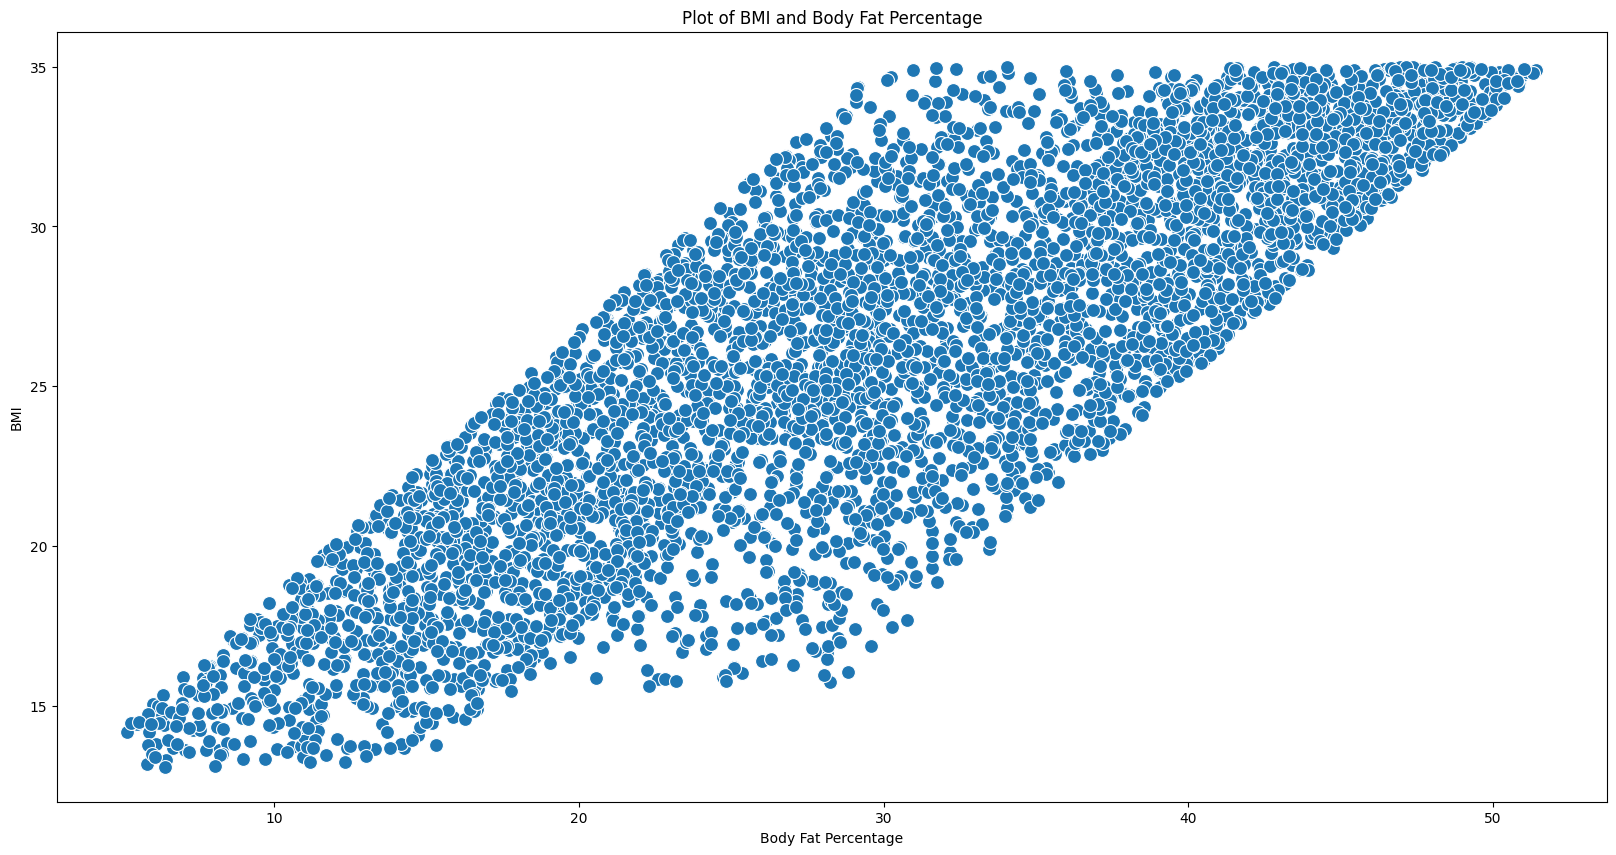

In [27]:
plt.figure(figsize=(20,10))
plt.title('Plot of BMI and Body Fat Percentage')
sns.scatterplot(data=fitpulse_dataset, x='Body Fat Percentage',y='BMI',s=100);

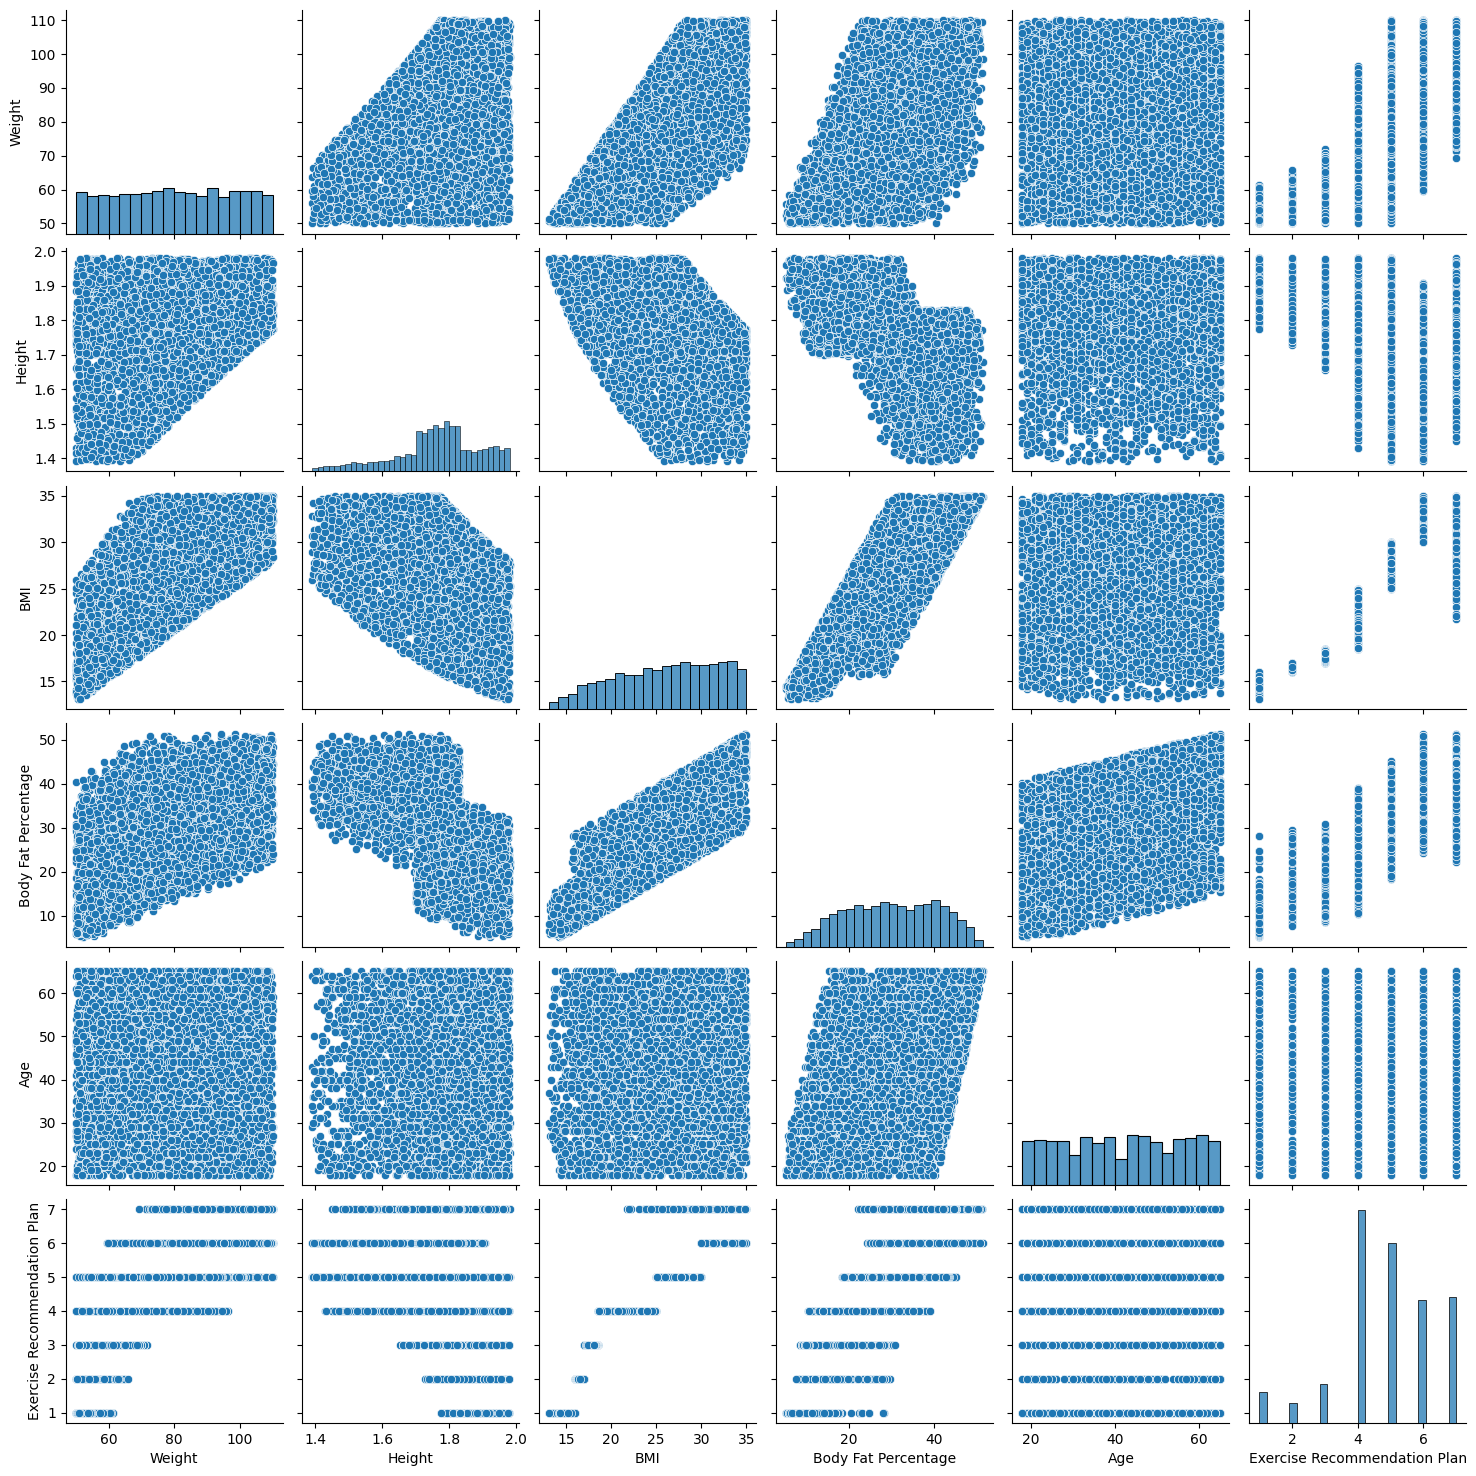

In [28]:
# Pairplot to visualize relationships between features
sns.pairplot(fitpulse_dataset)
plt.show()

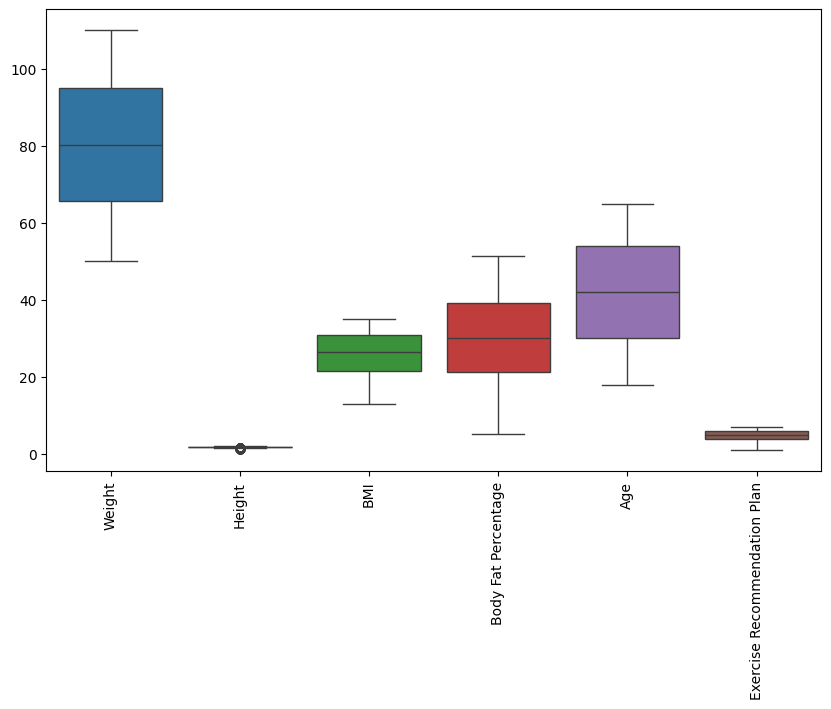

In [29]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=fitpulse_dataset)
plt.xticks(rotation=90)
plt.show()


In [30]:
# Let's check the column names and data types
print("Column Names and Data Types:")
print(fitpulse_dataset.dtypes)

# Let's also check for missing values
print("\nMissing Values:")
print(fitpulse_dataset.isnull().sum())

# Let's get basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")

print(fitpulse_dataset.describe())
print(fitpulse_dataset.info())
print(fitpulse_dataset.columns)
print(fitpulse_dataset.shape)


Column Names and Data Types:
Weight                          float64
Height                          float64
BMI                             float64
Body Fat Percentage             float64
BFPcase                          object
Gender                           object
Age                               int64
BMIcase                          object
Exercise Recommendation Plan      int64
dtype: object

Missing Values:
Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

Descriptive Statistics:
            Weight       Height          BMI  Body Fat Percentage  \
count  5000.000000  5000.000000  5000.000000          5000.000000   
mean     80.218232     1.762564    26.003673            29.974650   
std      17.161304     0.1286

In [31]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Let's encode the categorical features 'BMIcase', 'Gender' and 'BFPcase' columns
fitpulse_dataset['BFPcase'] = label_encoder.fit_transform(fitpulse_dataset['BFPcase'])
fitpulse_dataset['Gender'] = label_encoder.fit_transform(fitpulse_dataset['Gender'])
fitpulse_dataset['BMIcase'] = label_encoder.fit_transform(fitpulse_dataset['BMIcase'])

# Verifying to confirm if changes were successfully made.
print(fitpulse_dataset.head())
print(fitpulse_dataset.dtypes)

      Weight    Height        BMI  Body Fat Percentage  BFPcase  Gender  Age  \
0  76.811975  1.820521  23.175956            18.281148        0       1   29   
1  77.721154  1.945498  20.534184            13.731021        2       1   23   
2  87.558726  1.742754  28.828859            42.304631        3       0   57   
3  89.473356  1.758318  28.940017            27.958021        3       1   41   
4  69.963943  1.722570  23.578732            16.464478        2       1   19   

   BMIcase  Exercise Recommendation Plan  
0        2                             4  
1        2                             4  
2        4                             5  
3        4                             5  
4        2                             4  
Weight                          float64
Height                          float64
BMI                             float64
Body Fat Percentage             float64
BFPcase                           int64
Gender                            int64
Age                  

In [32]:
# Calculating the correlation matrix
correlation_matrix = fitpulse_dataset.corr()

# Checking the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Body Fat Percentage'].sort_values(ascending=False)

print("Correlation with Target (Body Fat Percentage):")
print(correlation_with_target)


Correlation with Target (Body Fat Percentage):
Body Fat Percentage             1.000000
BMI                             0.841736
Exercise Recommendation Plan    0.804440
BFPcase                         0.645126
BMIcase                         0.533908
Weight                          0.489617
Age                             0.319655
Height                         -0.569548
Gender                         -0.765117
Name: Body Fat Percentage, dtype: float64


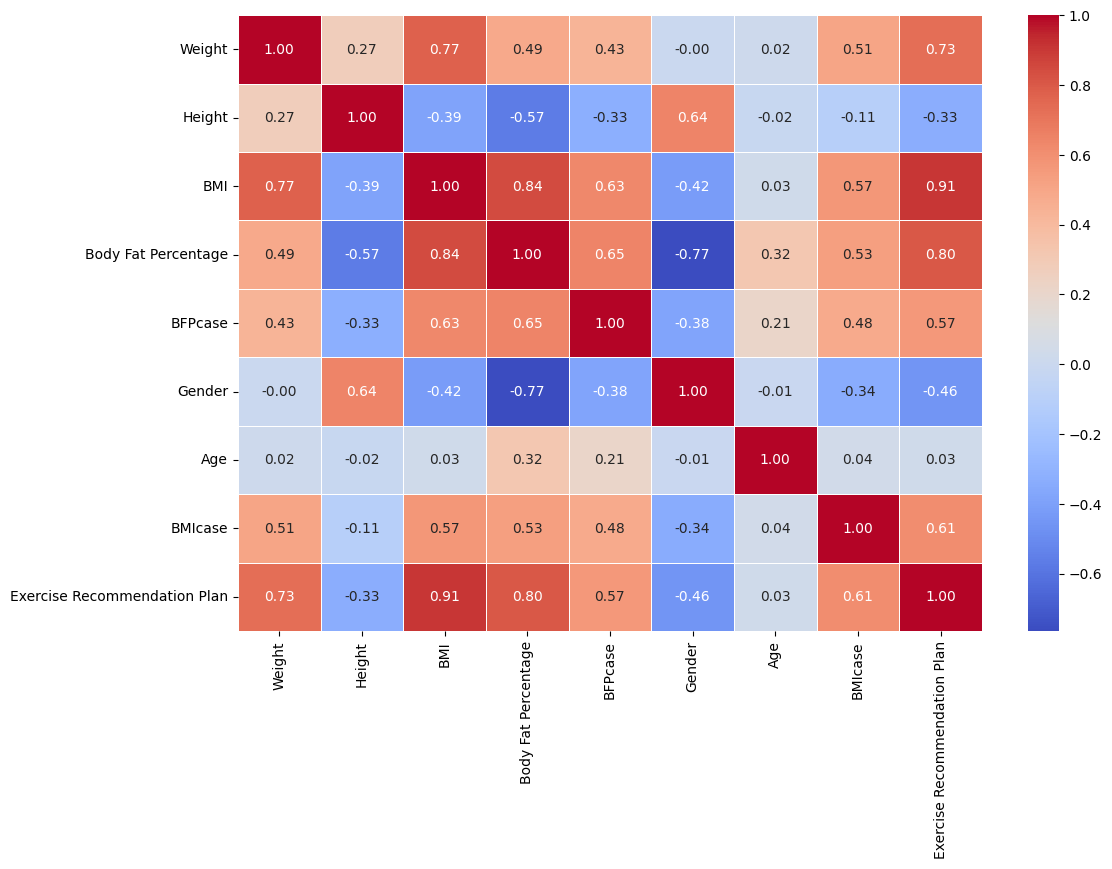

In [33]:
# Correlation heatmap
corr = fitpulse_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [34]:
# Droping features (less important ones)
fitpulse_dataset.drop(['BFPcase', 'BMIcase', 'Exercise Recommendation Plan'], axis=1, inplace=True)

# dataset after dropping them
print(fitpulse_dataset.head())


      Weight    Height        BMI  Body Fat Percentage  Gender  Age
0  76.811975  1.820521  23.175956            18.281148       1   29
1  77.721154  1.945498  20.534184            13.731021       1   23
2  87.558726  1.742754  28.828859            42.304631       0   57
3  89.473356  1.758318  28.940017            27.958021       1   41
4  69.963943  1.722570  23.578732            16.464478       1   19


In [35]:
# Defining features (X) and target (y)
X = fitpulse_dataset.drop('Body Fat Percentage', axis=1)  # Features
y = fitpulse_dataset['Body Fat Percentage']  # Target variable


In [36]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

THE LINEAR REGRESSION

In [38]:
# Let me initialize the model
linear_model = LinearRegression()
# Let's now train the linear regression model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Let's make predictions
y_pred_linear = linear_model.predict(X_test_scaled)



In [40]:
# # Evaluating the linear regression model

# R-squared error
error_score = r2_score(y_test, y_pred_linear)
print("Linear Regression - R squared error:", error_score)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression - Mean Squared Error of lr(MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Linear Regression - Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_linear)
print("Linear Regression - Mean Absolute Error (MAE):", mae)


Linear Regression - R squared error: 1.0
Linear Regression - Mean Squared Error of lr(MSE): 5.598545844353521e-29
Linear Regression - Root Mean Squared Error (RMSE): 7.48234311185575e-15
Linear Regression - Mean Absolute Error (MAE): 5.790923296444816e-15


THE DECISION TREE MODEL

In [41]:
# Initializing it
decision_tree = DecisionTreeRegressor(random_state=42)

# Training the model
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test_scaled)


# Evaluating the Decision Tree model

# R-squared error
error_score_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree - R squared error:", error_score_tree)

# Mean Squared Error (MSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree - Mean Squared Error (MSE):", mse_tree)

# Root Mean Squared Error (RMSE)
rmse_tree = np.sqrt(mse_tree)
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse_tree)

# Mean Absolute Error (MAE)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Decision Tree - Mean Absolute Error (MAE):", mae_tree)


Decision Tree - R squared error: 0.9984805435344309
Decision Tree - Mean Squared Error (MSE): 0.17599715206705602
Decision Tree - Root Mean Squared Error (RMSE): 0.4195201450074311
Decision Tree - Mean Absolute Error (MAE): 0.31360508696145994


THE RANDOM FOREST

In [42]:

# Initializing the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)

# Training the model
random_forest.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_forest = random_forest.predict(X_test_scaled)

# Evaluating

# R-squared error
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest - R squared error:", r2_forest)

# Mean Squared Error (MSE)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Random Forest - Mean Squared Error (MSE):", mse_forest)

# Root Mean Squared Error (RMSE)
rmse_forest = np.sqrt(mse_forest)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_forest)

# Mean Absolute Error (MAE)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print("Random Forest - Mean Absolute Error (MAE):", mae_forest)


Random Forest - R squared error: 0.9995965339353123
Random Forest - Mean Squared Error (MSE): 0.04673307853814024
Random Forest - Root Mean Squared Error (RMSE): 0.2161783489115879
Random Forest - Mean Absolute Error (MAE): 0.1526771958590918



After comparing the models, I chose the Random Forest. As per the results Random Forest is able to generalize well (High performance without overfittng). Linear Regression achieved a perfect R-squared of 1.0 and almost zero errors thus overfitting and this makes it less suitable for real-world predictions and can't genarize well on unseen data.

In [43]:
# Saving the Random Forest model and the scaler
joblib.dump(random_forest, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [49]:
def get_user_input():
    # Prompting the user for inputs
    weight = float(input("Enter your weight (kg): "))
    # here i am checking if weight is within the acceptable range
    if not (2.5 <= weight <= 300):
        raise ValueError("Weight must be between 2.5 and 300 kg.")

    height = float(input("Enter your height (m): "))
    # here i am checking if height is within the acceptable range
    if not (0.5 <= height <= 2.5):
        raise ValueError("Height must be between 0.5 and 2.5 meters.")

    bmi = float(input("Enter your BMI: "))
    # her i am checking if BMI is within the acceptable range
    if not (10 <= bmi <= 60):
        raise ValueError("BMI must be between 10 and 60.")

    gender = input("Enter your gender (Male/Female): ").capitalize()
    if gender not in ['Male', 'Female']:
        raise ValueError("Please enter a valid gender (Male/Female).")

    age = int(input("Enter your age: "))
    # here i am checking if age is within the acceptable range
    if not (0 <= age <= 120):
        raise ValueError("Age must be between 0 and 120 years.")

    return weight, height, bmi, gender, age

def predict_body_fat(weight, height, bmi, gender, age):
    # Defining the mappings for Gender
    gender_map = {'Male': 1, 'Female': 0}
    gender_encoded = gender_map.get(gender, -1)

    # Checking for an invalid gender input
    if gender_encoded == -1:
        raise ValueError("Invalid gender input. Please enter 'Male' or 'Female'.")

    # DataFrame creation
    input_data = pd.DataFrame({
        'Weight': [weight],
        'Height': [height],
        'BMI': [bmi],
        'Gender': [gender_encoded],
        'Age': [age]
    })


    input_data = input_data[X.columns]


    # Standardizing the input features
    input_scaled = scaler.transform(input_data)


    # Making a prediction using the trained Random Forest model
    predicted_bfp = random_forest.predict(input_scaled)

    return predicted_bfp[0]

# Get user input and predict the Body Fat Percentage
# weight, height, bmi, gender, age = get_user_input()

weight, height, bmi, gender, age = (70,1.78,23,"Male",32)

predicted_bfp = predict_body_fat(weight, height, bmi, gender, age)


print(f"Predicted Body Fat Percentage: {predicted_bfp:.2f}")


Predicted Body Fat Percentage: 18.83
